In [15]:
import os 
import numpy as np 
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import MinMaxScaler
from mlxtend.plotting import scatterplotmatrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [16]:
train_data = pd.read_excel('C:\\Users\\howger\\Desktop\\kaggle2\\train.xlsx')
test_data = pd.read_excel('C:\\Users\\howger\\Desktop\\kaggle2\\test.xlsx')
A = test_data.iloc[:,1:12]

In [6]:
train_data.head()


,id,所在城市,建造年度,塔架高度指標,風場面積,當地平均風速,離岸,機軸狀況,底座面積,葉片等級,翻修年度,損耗等級
0,1,Shoreline,1955,1.50,1340,7912,0,3,1340,3,2005,1.5
1,2,Seattle,1921,2.50,3650,9050,0,5,3370,5,0,2.0
2,3,Kent,1966,2.00,1930,11947,0,4,1930,3,0,1.0
3,4,Bellevue,1963,2.25,2000,8030,0,4,1000,3,0,1.0
4,5,Redmond,1976,2.50,1940,10500,0,4,1140,4,1992,1.0


In [17]:
# 方便後續呼叫特徵，更改 特徵名稱
import pandas as pd

# 讀取 Excel 檔案
y = train_data["Power"]
train_data.drop(["Power"], axis="columns", inplace=True)
train_data.drop(["id"], axis="columns", inplace=True)

# 取得原始的 column name
original_columns = train_data.columns.tolist()

# 建立新的 column name 字串型態
new_columns = ['{:03d}'.format(i) for i in range(101, 112)]

# 重新排列 column name
train_data.columns = new_columns
A.columns = new_columns

# 印出結果
print(train_data.columns)

Index(['101', '102', '103', '104', '105', '106', '107', '108', '109', '110',
       '111'],
      dtype='object')


In [18]:
# one_hot encoder to cities feature
# 以下是所有 城市名稱，將其進行編碼
city_labels = ['North Bend', 'Seattle', 'Bellevue', 'Bothell', 'Federal Way', 'Kirkland', 'Issaquah', 'Woodinville',
               'Shoreline', 'Auburn', 'Maple Valley', 'Normandy Park', 'Fall City', 'Renton', 'Redmond', 'Sammamish',
               'Carnation', 'Snoqualmie', 'Kent', 'Kenmore', 'Newcastle', 'Mercer Island', 'Burien', 'Black Diamond',
               'Ravensdale', 'Covington', 'Clyde Hill', 'Algona', 'Lake Forest Park', 'Duvall', 'Skykomish', 'Tukwila',
               'Des Moines', 'Vashon', 'Yarrow Point', 'SeaTac', 'Medina', 'Snoqualmie Pass', 'Enumclaw', 'Pacific',
               'Preston', 'Milton','Inglewood-Finn Hill','Beaux Arts Village']

# 建立編碼字典
encoded_labels = {label: i for i, label in enumerate(city_labels)}

# 將訓練數據進行編碼
train_data["101"] = train_data["101"].map(encoded_labels)

# 將測試數據進行編碼
A["101"] = A["101"].map(encoded_labels)

In [11]:
train_data.head()

,101,102,103,104,105,106,107,108,109,110,111
0,0,1983,1.50,1180,10277,0,3,1180,3,2009,1.0
1,1,1923,1.75,2240,10578,0,5,1550,3,0,2.0
2,2,1954,1.00,1450,8800,0,4,1450,4,1979,1.0
3,1,2005,2.25,1750,1572,0,3,1470,3,0,2.5
4,3,1991,2.50,2730,12261,0,3,2730,4,0,2.0


 1) 105                            0.173450
 2) 104                            0.157904
 3) 108                            0.155254
 4) 102                            0.142635
 5) 101                            0.093776
 6) 103                            0.079003
 7) 110                            0.070087
 8) 109                            0.054550
 9) 107                            0.039102
10) 111                            0.032083
11) 106                            0.002156


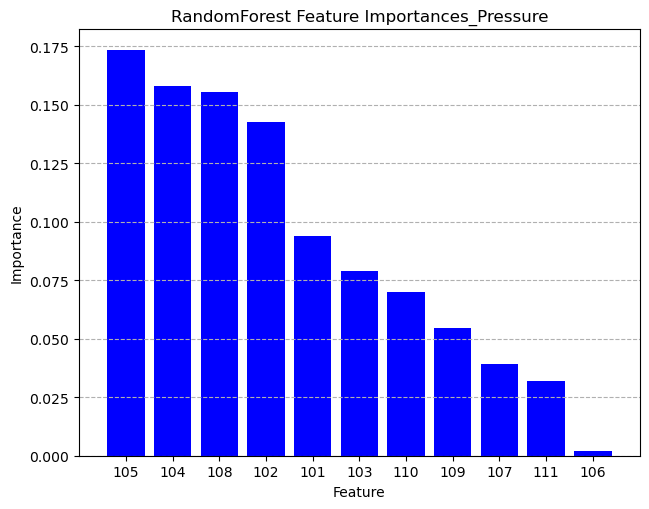

In [19]:
# 特徵評估
from  sklearn.ensemble import RandomForestClassifier

X = train_data
# 下面這行請選擇你的特徵 元素 [:10]，代表開頭到第10行是特徵
feat_labels = X.columns[:11]
tree = RandomForestClassifier(n_estimators=500, random_state=1)
tree.fit(X, y.astype('int'))
importances = tree.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))



plt.bar(range(X.shape[1]), 
        importances[indices],
        align='center',
        color = 'blue')

plt.xticks(range(X.shape[1]), 
            feat_labels[indices] )
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.ylabel('Importance')
plt.grid(axis='y',linestyle='--')
plt.xlabel('Feature')
plt.title("RandomForest Feature Importances_Pressure")
#plt.savefig('images/04_09.png', dpi=300)
plt.show() 

In [20]:
# 移除特徵
X = train_data
X.drop(["110"], axis="columns", inplace=True)
X.drop(["106"], axis="columns", inplace=True)
X.drop(["109"], axis="columns", inplace=True)
X.drop(["107"], axis="columns", inplace=True)
X.drop(["111"], axis="columns", inplace=True)


A.drop(["110"], axis="columns", inplace=True)
A.drop(["106"], axis="columns", inplace=True)
A.drop(["107"], axis="columns", inplace=True)
A.drop(["109"], axis="columns", inplace=True)
A.drop(["111"], axis="columns", inplace=True)

In [21]:
# MinMax scaler 
# train, val, test split
from sklearn.preprocessing import MinMaxScaler
scalerx = MinMaxScaler()
X = scalerx.fit_transform(X) # 將訓練數據 轉換成0-1的矩陣
A = scalerx.fit_transform(A) 
# split 會變成陣列
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.1, random_state=None)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1, random_state=None)

In [27]:
print("X_train data number:",X_train.shape)
print("X_val data number:",X_val.shape)
print("X_test data number:", X_test.shape)

X_train data number: (2817, 6)
X_val data number: (313, 6)
X_test data number: (348, 6)


In [28]:
# Gradient Boosting model
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

# 建立模型
model = GradientBoostingRegressor()

# 訓練模型
model.fit(X_train, y_train)

# 預測測試集
y_prediction = model.predict(X_test)
y_prediction_train = model.predict(X_train)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
# 顯示 預測結果分數
print("=========== Gradient Boosting =============")
print('R2 Test: ',r2_score(y_test, y_prediction))
print('R2 Train: ',r2_score(y_train,y_prediction_train))
print()

print('MSE test: ',mean_squared_error(y_test, y_prediction))
print('MSE train', mean_absolute_error(y_train, y_prediction_train))
print()
print('MAE test: %.3f' %(mean_absolute_error(y_test, y_prediction)))
print('MAE train: %.3f' %(mean_absolute_error(y_train, y_prediction_train)))

=========== Gradient Boosting =============
R2 Test:  0.10135157903816949
R2 Train:  0.8492494162613897

MSE test:  4734777224.611639
MSE train 12279.370272347123

MAE test: 16448.181
MAE train: 12279.370


In [29]:
# Linear Regression model
from sklearn.linear_model import LinearRegression
model_LR = LinearRegression()
model_LR.fit(X_train, y_train)
y_prediction = model_LR.predict(X_test)
y_prediction_train = model_LR.predict(X_train)


from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
print("============= Linear Regression=========")
print('R2 Test: ',r2_score(y_test, y_prediction))
print('R2 Train: ',r2_score(y_train,y_prediction_train))
print()

print('MSE test: ',mean_squared_error(y_test, y_prediction))
print('MSE train', mean_absolute_error(y_train, y_prediction_train))
print()
print('MAE test: %.3f' %(mean_absolute_error(y_test, y_prediction)))
print('MAE train: %.3f' %(mean_absolute_error(y_train, y_prediction_train)))

============= Linear Regression=========
R2 Test:  0.10984360149112637
R2 Train:  0.17235688783986436

MSE test:  4690034660.597432
MSE train 17268.335664980583

MAE test: 17694.621
MAE train: 17268.336


In [30]:
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import MinMaxScaler
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# 建立一個Sequential型態的model
DNN = keras.Sequential(name='DNN-1')
# 第1層全連接層設為64個unit，將輸入形狀設定為(11, )，而實際上我們輸入的數據形狀為(batch_size, 11)
DNN.add(layers.Dense(6, activation='ReLU', input_shape=(6,)))
# 第2層全連接層設為64個unit
DNN.add(layers.Dense(10, activation='ReLU'))
DNN.add(layers.Dense(10, activation='ReLU'))
DNN.add(layers.Dense(10, activation='ReLU'))
DNN.add(layers.Dense(1))
DNN.compile(
    # optimizers使用Adam(0.002)
    optimizer=keras.optimizers.Adam(0.00005),
    # loss使用MAE Loss
    loss=keras.losses.MeanSquaredError(),
    metrics=[keras.metrics.MeanAbsoluteError()]
)

history = DNN.fit(X_train, y_train,
                    batch_size=1,
                    epochs=100,
                    validation_data=(X_val, y_val)
                    )

print("============= DNN Regression=========")
print('R2 Test: ',r2_score(y_test, y_prediction))
print('R2 Train: ',r2_score(y_train,y_prediction_train))
print()

print('MSE test: ',mean_squared_error(y_test, y_prediction))
print('MSE train', mean_absolute_error(y_train, y_prediction_train))
print()
print('MAE test: %.3f' %(mean_absolute_error(y_test, y_prediction)))
print('MAE train: %.3f' %(mean_absolute_error(y_train, y_prediction_train)))

Epoch 1/100
2817/2817 [==============================] - 2s 512us/step - loss: 6858925056.0000 - mean_absolute_error: 55669.9258 - val_loss: 4695625728.0000 - val_mean_absolute_error: 56830.1289
Epoch 2/100
2817/2817 [==============================] - 1s 445us/step - loss: 6858220032.0000 - mean_absolute_error: 55664.1250 - val_loss: 4694451200.0000 - val_mean_absolute_error: 56820.2695
Epoch 3/100
2817/2817 [==============================] - 1s 442us/step - loss: 6856558592.0000 - mean_absolute_error: 55649.7891 - val_loss: 4691923968.0000 - val_mean_absolute_error: 56799.1367
Epoch 4/100
2817/2817 [==============================] - 1s 458us/step - loss: 6852420608.0000 - mean_absolute_error: 55614.6406 - val_loss: 4686053888.0000 - val_mean_absolute_error: 56750.1133
Epoch 5/100
2817/2817 [==============================] - 1s 480us/step - loss: 6844392448.0000 - mean_absolute_error: 55546.4492 - val_loss: 4675108864.0000 - val_mean_absolute_error: 56658.5039
Epoch 6/100
2817/2817 [==

Epoch 43/100
2817/2817 [==============================] - 1s 471us/step - loss: 3541498368.0000 - mean_absolute_error: 23300.6016 - val_loss: 1251660416.0000 - val_mean_absolute_error: 23289.6387
Epoch 44/100
2817/2817 [==============================] - 1s 483us/step - loss: 3539968000.0000 - mean_absolute_error: 23273.9629 - val_loss: 1249742464.0000 - val_mean_absolute_error: 23259.0645
Epoch 45/100
2817/2817 [==============================] - 1s 479us/step - loss: 3538002944.0000 - mean_absolute_error: 23248.7773 - val_loss: 1248066304.0000 - val_mean_absolute_error: 23266.9590
Epoch 46/100
2817/2817 [==============================] - 1s 421us/step - loss: 3536656640.0000 - mean_absolute_error: 23287.9141 - val_loss: 1246591232.0000 - val_mean_absolute_error: 23250.4902
Epoch 47/100
2817/2817 [==============================] - 1s 437us/step - loss: 3535189248.0000 - mean_absolute_error: 23240.1895 - val_loss: 1244755968.0000 - val_mean_absolute_error: 23232.3477
Epoch 48/100
2817/28

Epoch 85/100
2817/2817 [==============================] - 1s 433us/step - loss: 3479033088.0000 - mean_absolute_error: 22564.4238 - val_loss: 1185678208.0000 - val_mean_absolute_error: 22578.5391
Epoch 86/100
2817/2817 [==============================] - 1s 438us/step - loss: 3477359104.0000 - mean_absolute_error: 22571.6035 - val_loss: 1184411776.0000 - val_mean_absolute_error: 22563.7012
Epoch 87/100
2817/2817 [==============================] - 1s 440us/step - loss: 3476194048.0000 - mean_absolute_error: 22491.8730 - val_loss: 1182804864.0000 - val_mean_absolute_error: 22542.6406
Epoch 88/100
2817/2817 [==============================] - 1s 440us/step - loss: 3474602752.0000 - mean_absolute_error: 22517.5137 - val_loss: 1181413504.0000 - val_mean_absolute_error: 22535.3398
Epoch 89/100
2817/2817 [==============================] - 1s 436us/step - loss: 3473284608.0000 - mean_absolute_error: 22482.5176 - val_loss: 1179864960.0000 - val_mean_absolute_error: 22508.1484
Epoch 90/100
2817/28

In [32]:
# =========================== result summary ===================
'''
============= DNN Regression=========
R2 Test:  0.10984360149112637
R2 Train:  0.17235688783986436

MSE test:  4690034660.597432
MSE train 17268.335664980583

MAE test: 17694.621
MAE train: 17268.336

============= Linear Regression=========
R2 Test:  0.10984360149112637
R2 Train:  0.17235688783986436

MSE test:  4690034660.597432
MSE train 17268.335664980583

MAE test: 17694.621
MAE train: 17268.336

=========== Gradient Boosting =============
R2 Test:  0.10135157903816949
R2 Train:  0.8492494162613897

MSE test:  4734777224.611639
MSE train 12279.370272347123

MAE test: 16448.181
MAE train: 12279.370

'''

'\n============= DNN Regression=========\nR2 Test:  0.10984360149112637\nR2 Train:  0.17235688783986436\n\nMSE test:  4690034660.597432\nMSE train 17268.335664980583\n\nMAE test: 17694.621\nMAE train: 17268.336\n\n============= Linear Regression=========\nR2 Test:  0.10984360149112637\nR2 Train:  0.17235688783986436\n\nMSE test:  4690034660.597432\nMSE train 17268.335664980583\n\nMAE test: 17694.621\nMAE train: 17268.336\n\n=========== Gradient Boosting =============\nR2 Test:  0.10135157903816949\nR2 Train:  0.8492494162613897\n\nMSE test:  4734777224.611639\nMSE train 12279.370272347123\n\nMAE test: 16448.181\nMAE train: 12279.370\n\n'

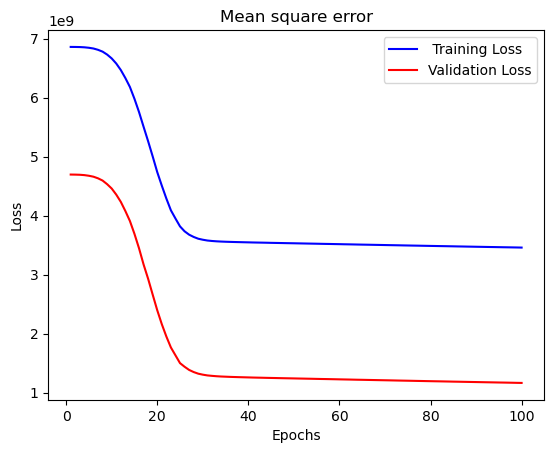

In [33]:
# === DNN results plot ======
# loss MSE curve
loss = history.history["loss"]
val_loss = history.history["val_loss"]  # 取得驗證損失
epochs = range(1, len(loss) + 1)
plt.title('Mean square error')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.plot(epochs, loss, "b-", label=" Training Loss")
plt.plot(epochs, val_loss, "r-", label="Validation Loss")  # 繪製驗證損失
plt.legend()  # 顯示圖例
plt.show()



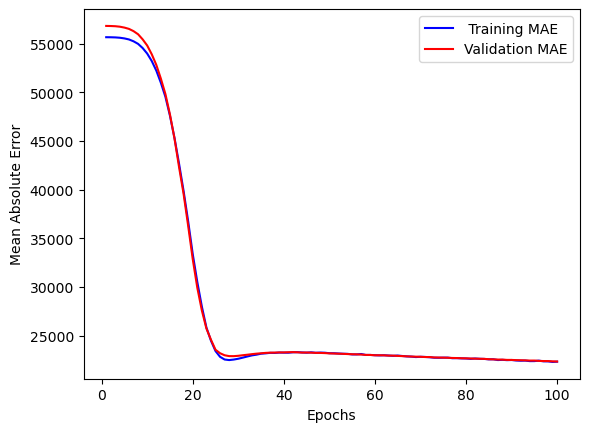

In [34]:
# === DNN results plot ======
# MAE curve
import matplotlib.pyplot as plt

# 獲取訓練集的 MAE 歷史值
mae_train = history.history['mean_absolute_error']

# 獲取驗證集的 MAE 歷史值
mae_val = history.history['val_mean_absolute_error']

# 繪製 MAE 的圖形
epochs = range(1, len(mae_train) + 1)
plt.plot(epochs, mae_train, 'b', label=' Training MAE')
plt.plot(epochs, mae_val, 'r', label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()

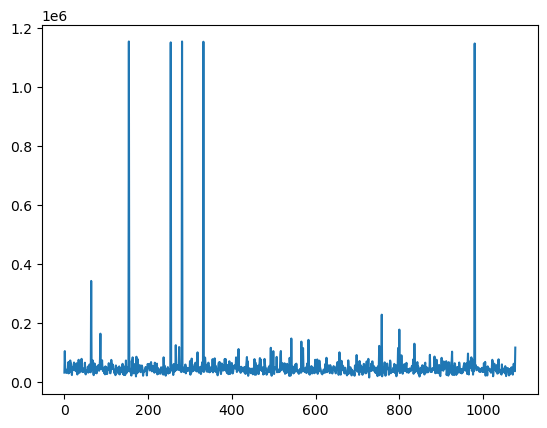

In [37]:
# 預測 繳交版本的答案
submission_DNN = model.predict(A)
plt.plot(submission)

In [ ]:
# 繳交版本_
predicted_ans = model.predict(A)
test_ids = test_data['id']
my_submission = pd.DataFrame({'id':test_ids, 'Power':predicted_ans[:,0]})
my_submission.to_csv('submission.csv', index=False)